In [8]:
import pandas as pd
churn_raw = pd.read_csv('churn.csv')
churn_data=churn_raw.copy()
churn_data.drop(columns=['RowNumber'], inplace=True)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

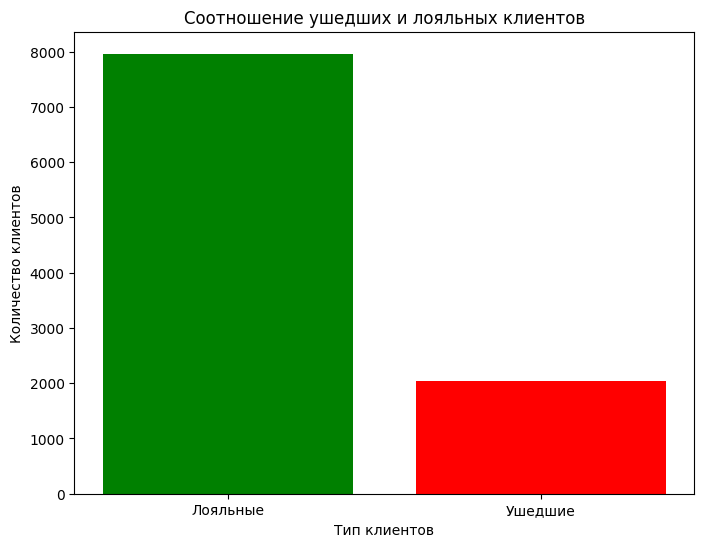

На графике показано соотношение ушедших и лояльных клиентов.
Всего клиентов: 10000
Лояльные клиенты: 7963 (79.63%)
Ушедшие клиенты: 2037 (20.37%)
Соотношение позволяет увидеть, что ушедших клиентов малый процент, но он всё-таки есть.Нужно разобраться, почему они уходят.
И вобще в силах ли мы повлиять на эту тенденцию. Может проблема даже не в банке.


In [56]:
#9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Создание столбчатой диаграммы для соотношения ушедших и лояльных клиентов
churn_data['Loyal'] = churn_data['Exited'] == 0
churn_data['Churn'] = churn_data['Exited'] == 1

loyal_count = churn_data['Loyal'].sum()
churned_count = churn_data['Churn'].sum()

plt.figure(figsize=(8, 6))
plt.bar(
    ['Лояльные', 'Ушедшие'], 
    [loyal_count, churned_count], 
    color=['green', 'red'])
plt.title("Соотношение ушедших и лояльных клиентов")
plt.xlabel("Тип клиентов")
plt.ylabel("Количество клиентов")

plt.show()

# Комментарий по соотношению
total_clients = len(churn_data)
loyal_percentage = (loyal_count / total_clients) * 100
churned_percentage = (churned_count / total_clients) * 100

print("На графике показано соотношение ушедших и лояльных клиентов.")
print(f"Всего клиентов: {total_clients}")
print(f"Лояльные клиенты: {loyal_count} ({loyal_percentage:.2f}%)")
print(f"Ушедшие клиенты: {churned_count} ({churned_percentage:.2f}%)")
print("Соотношение позволяет увидеть, что ушедших клиентов малый процент, но он всё-таки есть.Нужно разобраться, почему они уходят.")
print("И вобще в силах ли мы повлиять на эту тенденцию. Может проблема даже не в банке.")

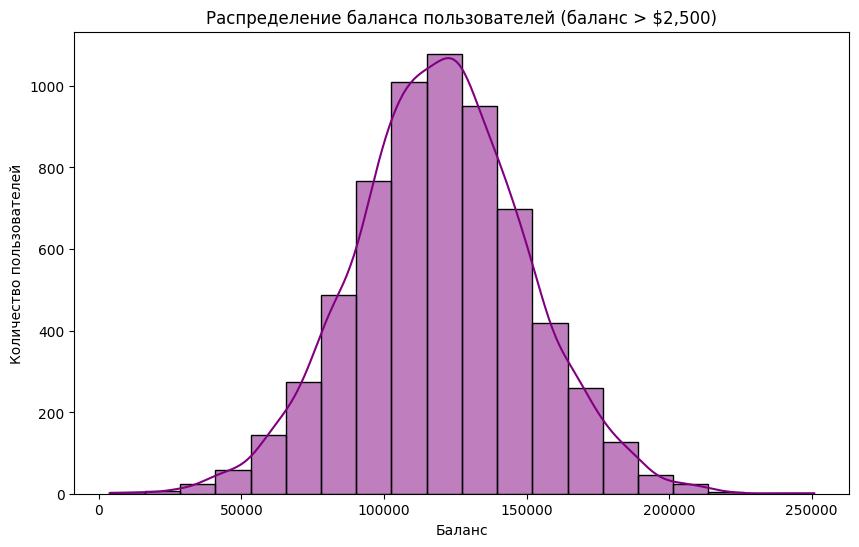

График показывает распределение баланса пользователей, у которых на счету больше $2,500.
Большинство пользователей имеют баланс в диапазоне от $12000 до $130000.
Что конечно яявляется хорошим фактором для банка. Можно также посчитать % этих людей от общего количества клиентов, чтобы иметь полную картину.


In [58]:
#9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
# Опишите распределение и сделайте выводы.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Фильтрация данных для пользователей с балансом больше 2,500 долларов
filtered_data = churn_data[churn_data['Balance'] > 2500]

plt.figure(figsize=(10, 6))
sns.histplot(
    data=filtered_data, 
    x='Balance', 
    bins=20, 
    kde=True, 
    color='purple')
plt.title("Распределение баланса пользователей (баланс > $2,500)")
plt.xlabel("Баланс")
plt.ylabel("Количество пользователей")

plt.show()

# Комментарий и выводы
print("График показывает распределение баланса пользователей, у которых на счету больше $2,500.")
print("Большинство пользователей имеют баланс в диапазоне от $12000 до $130000.")
print("Что конечно яявляется хорошим фактором для банка. Можно также посчитать % этих людей от общего количества клиентов, чтобы иметь полную картину.")

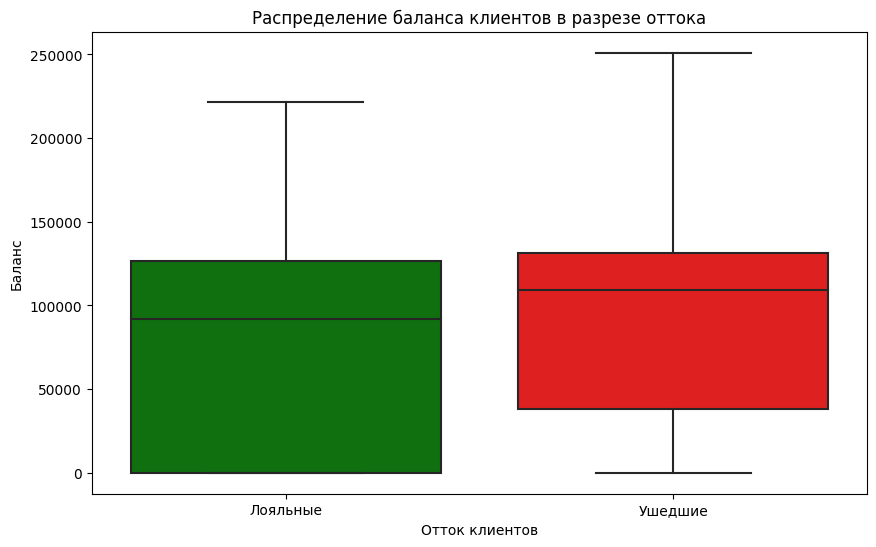

Интересный график. У ушедших клиентов минальынй порог начинается от 4000б в то время как у лояльных может порог минимума начинается с 0
У ушещих клиентов 50% клиентов распологают балансом выше, чем у лояльных, равно как и медианным знчением.
В принципе эти люди могут быть интересны банку.


In [66]:

#9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
#Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
#Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

churn_data['Loyal'] = churn_data['Exited'] == 0
churn_data['Churn'] = churn_data['Exited'] == 1

loyal_count = churn_data['Loyal'].sum()
churned_count = churn_data['Churn'].sum()

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Exited', 
    y='Balance', 
    data=churn_data, 
    palette=['green', 'red'])
plt.title("Распределение баланса клиентов в разрезе оттока")
plt.xlabel("Отток клиентов")
plt.ylabel("Баланс")

# Замена значений 0 и 1 на названия
plt.xticks([0, 1], ['Лояльные', 'Ушедшие'])

plt.show()

# Комментарий и выводы
print("Интересный график. У ушедших клиентов минальынй порог начинается от 4000б в то время как у лояльных может порог минимума начинается с 0")
print("У ушещих клиентов 50% клиентов распологают балансом выше, чем у лояльных, равно как и медианным знчением.")
print("В принципе эти люди могут быть интересны банку.")

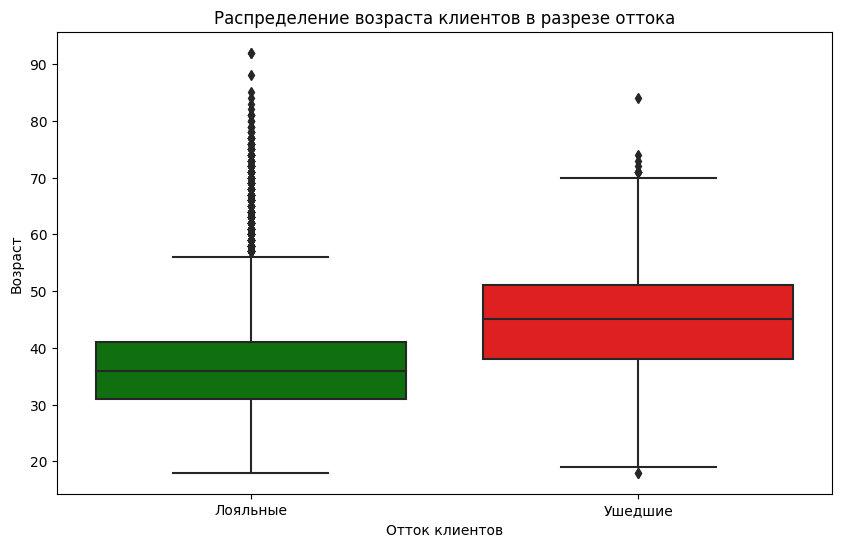

Из графика видно, что лояльные клиенты состовляют возрастную группу от 32-42 лет, а ушедшие 38-52.
Больше потенциальных выбросов у лояльный клиентов.Разница в группах по возрасту миимальная- все относятся к группах средних лет. 
Может люди чуть постарше свои сбережения тратят на что-то другое, немного меняется жизненные установки - как пример кризис среднего возраста.


In [12]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? 
#На какую возрастную категорию клиентов стоит обратить внимание банку?

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=churn_data, palette=['green', 'red'])
plt.title("Распределение возраста клиентов в разрезе оттока")
plt.xlabel("Отток клиентов")
plt.ylabel("Возраст")

# Замена значений 0 и 1 на названия
plt.xticks([0, 1], ['Лояльные', 'Ушедшие'])

plt.show()

# Комментарий и выводы
print("Из графика видно, что лояльные клиенты состовляют возрастную группу от 32-42 лет, а ушедшие 38-52.")
print("Больше потенциальных выбросов у лояльный клиентов.Разница в группах по возрасту миимальная- все относятся к группах средних лет. ")
print("Может люди чуть постарше свои сбережения тратят на что-то другое, немного меняется жизненные установки - как пример кризис среднего возраста.")

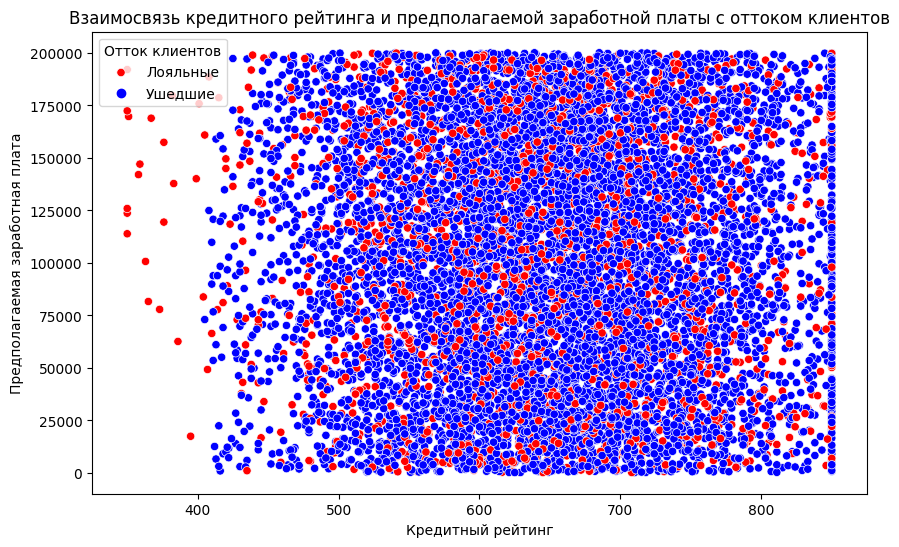

Взаимосвязи не вижу.


In [14]:
#9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. 
# Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', data=churn_data, hue='Exited', palette=['blue', 'red'])
plt.title("Взаимосвязь кредитного рейтинга и предполагаемой заработной платы с оттоком клиентов")
plt.xlabel("Кредитный рейтинг")
plt.ylabel("Предполагаемая заработная плата")
plt.legend(title="Отток клиентов", labels=["Лояльные", "Ушедшие"])

plt.show()

# Комментарий и выводы
print("Взаимосвязи не вижу.")

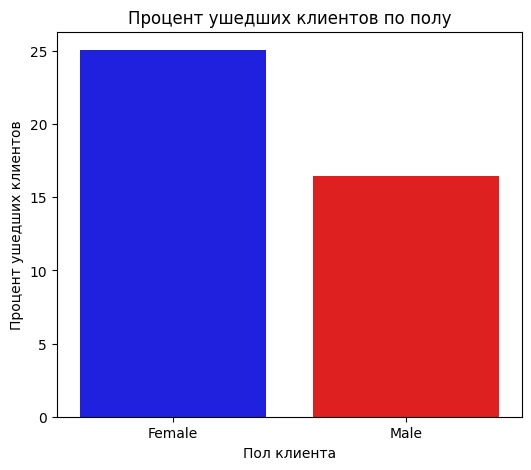

Больше уходят женщин. Но тут может быть ложное восприятие пола. Потому как жена может хранить все сбережения мужа и оплачивать все услуги,
при этом не являясь добытчиком. Тут нужно обратиться внимание на обслуживание в банках, возможно тут кроется проблема.


In [19]:
#9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Рассчитываем процент ушедших клиентов для каждой группы
churn_by_gender = churn_data.groupby('Gender')['Exited'].mean() * 100

plt.figure(figsize=(6, 5))
sns.barplot(
    x=churn_by_gender.index,
    y=churn_by_gender.values,
    palette=['blue', 'red']
)
plt.title("Процент ушедших клиентов по полу")
plt.xlabel("Пол клиента")
plt.ylabel("Процент ушедших клиентов")

plt.show()

# Комментарий и выводы
print("Больше уходят женщин. Но тут может быть ложное восприятие пола. Потому как жена может хранить все сбережения мужа и оплачивать все услуги,")
print("при этом не являясь добытчиком. Тут нужно обратиться внимание на обслуживание в банках, возможно тут кроется проблема.")

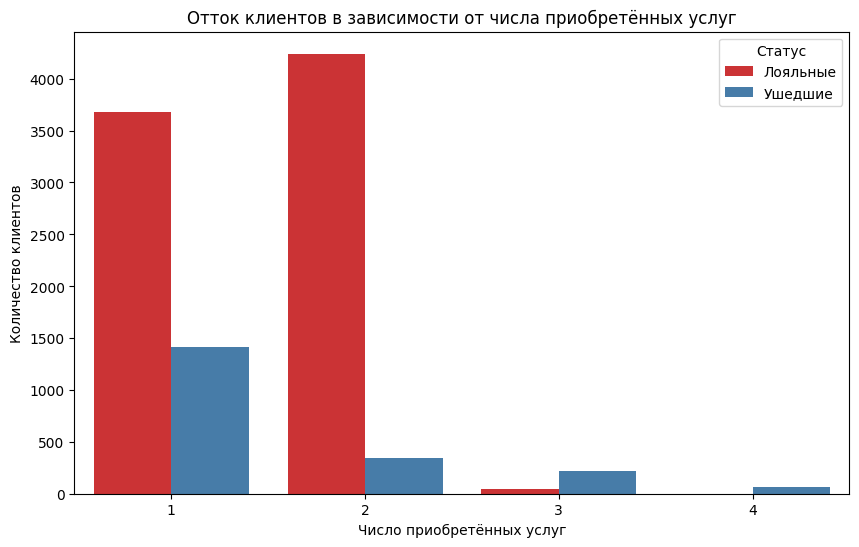

Вижу, что ажиотаж поднимают две первые услуги, последующие две мало на что влияют, возможно люди уже привыли, а может услуги 
не предоставляют ценности для людей, возможно даже раздражают, так как столбики с оттоком выше чем у лояльных.
Нужно проверить, что там за услуги, возможно от них вообще октазаться либо заменить.


In [26]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=churn_data, x='NumOfProducts', hue='Exited', palette='Set1')
plt.title("Отток клиентов в зависимости от числа приобретённых услуг")
plt.xlabel("Число приобретённых услуг")
plt.ylabel("Количество клиентов")

# Заменяем значения 0 и 1 на "Лояльные" и "Ушедшие" в легенде
handles, labels = ax.get_legend_handles_labels()
labels = ['Лояльные', 'Ушедшие']
ax.legend(handles=handles, labels=labels, title='Статус')

plt.show()
print("Вижу, что ажиотаж поднимают две первые услуги, последующие две мало на что влияют, возможно люди уже привыли, а может услуги ")
print("не предоставляют ценности для людей, возможно даже раздражают, так как столбики с оттоком выше чем у лояльных.")
print("Нужно проверить, что там за услуги, возможно от них вообще октазаться либо заменить.")

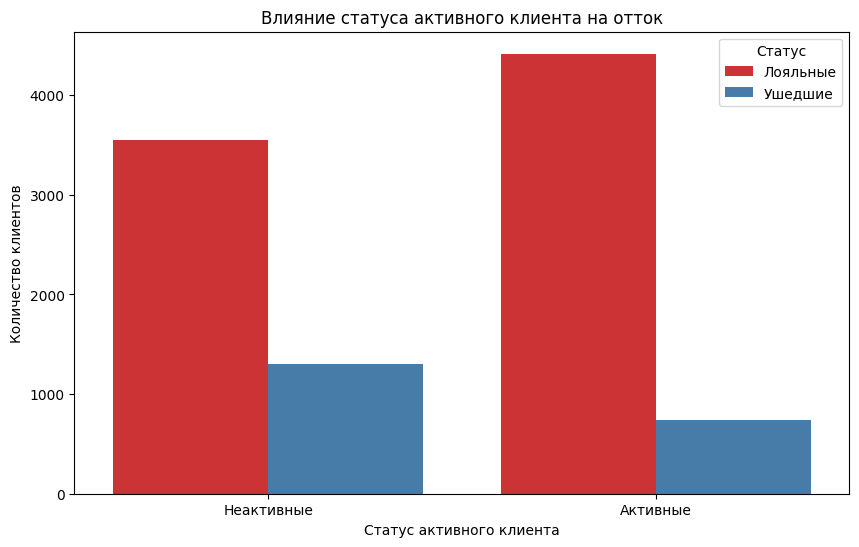

Различия имеются, но не думаю, что существенныые. Скорее всего, статус активного клиента для человека как накопительныя карта-
вроде как есть, а вроде как и нет.Если вдруг забудешь дома, не сильно расстроишься.
По этому графику трудно судить о созависимости этих признаков. Необходимы доп исследования, нужно узнать в чем суть этого статуса,
чтобы оценить его весомость для клиента.


In [44]:
#9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. 
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=churn_data, x='IsActiveMember', hue='Exited', palette='Set1')
plt.title("Влияние статуса активного клиента на отток")
plt.xlabel("Статус активного клиента")
plt.ylabel("Количество клиентов")

# Заменяем значения 0 и 1 на "Лояльные" и "Ушедшие" в легенде
handles, labels = ax.get_legend_handles_labels()
labels = ['Лояльные', 'Ушедшие']
ax.legend(handles=handles, labels=labels, title='Статус')

plt.xticks([0, 1], ['Неактивные', 'Активные'])

plt.show()
print("Различия имеются, но не думаю, что существенныые. Скорее всего, статус активного клиента для человека как накопительныя карта-")
print("вроде как есть, а вроде как и нет.Если вдруг забудешь дома, не сильно расстроишься.")
print("По этому графику трудно судить о созависимости этих признаков. Необходимы доп исследования, нужно узнать в чем суть этого статуса,")
print("чтобы оценить его весомость для клиента.")

In [48]:

#9.9. В какой стране доля ушедших клиентов больше?
#Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

import pandas as pd
import plotly.express as px

# Подсчет доли ушедших клиентов по странам
churn_by_country = churn_data.groupby('Geography')['Exited'].mean().reset_index()

# Построение тепловой картограммы с использованием Plotly
fig = px.choropleth(
    churn_by_country,
    locations="Geography",
    locationmode="country names",
    color="Exited",
    color_continuous_scale="Viridis",
    title="Доля ушедших клиентов по странам"
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

fig.show()

print("Больше всего отток клиентов из филиалов банков в Германии.")
print("Предположить тут можно многое. Нужно узнат предпочтения самих немцев, экономическую ситуацию в стране. ")
print("Может в возрасте от 38-52 они как раз начинают путешевствовать либо ")
print("скопленные деньги отдают взрослым детям на обучение или свадьбу.")


Больше всего отток клиентов из филиалов банков в Германии.
Предположить тут можно многое. Нужно узнат предпочтения самих немцев, экономическую ситуацию в стране. 
Может в возрасте от 38-52 они как раз начинают путешевствовать либо 
скопленные деньги отдают взрослым детям на обучение или свадьбу.


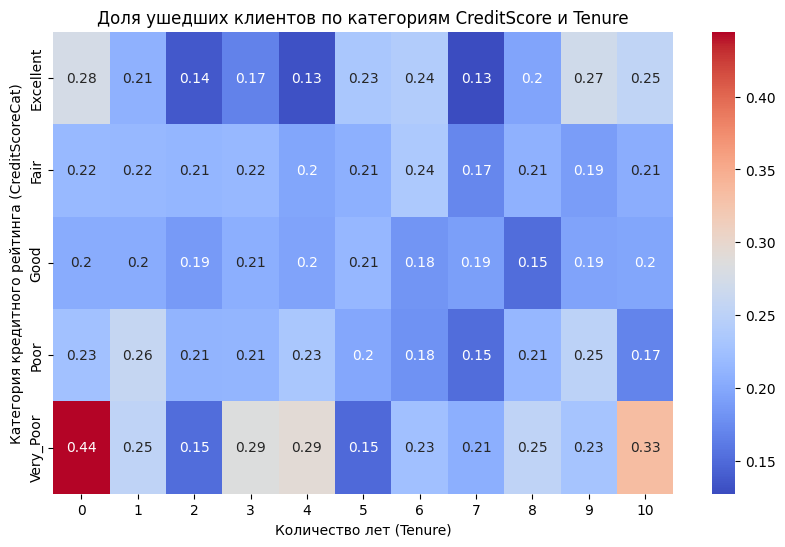

Клиенты с самым плохим кредитным рейтингом уходят практически сразу.
Вот тут то и кроется наша как казалось на первый взглдя проблема. 
Судя по равномерному синемму оттенку клиенты в принипе лояльны к банку. 
Хорошие примеры. Можно на проблему посмотреть с многих сторон и найти проблему. 


In [50]:
#9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Применение функции к столбцу CreditScore
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

# Сводная таблица
pivot_table = churn_data.pivot_table(
    index='CreditScoreCat', 
    columns='Tenure', 
    values='Exited', 
    aggfunc='mean')

# Создание тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title("Доля ушедших клиентов по категориям CreditScore и Tenure")
plt.xlabel("Количество лет (Tenure)")
plt.ylabel("Категория кредитного рейтинга (CreditScoreCat)")
plt.show()


print("Клиенты с самым плохим кредитным рейтингом уходят практически сразу.")
print("Вот тут то и кроется наша как казалось на первый взглдя проблема. ")
print("Судя по равномерному синемму оттенку клиенты в принипе лояльны к банку. ")
print("Хорошие примеры. Можно на проблему посмотреть с многих сторон и найти проблему. ")
